In [1]:
import numpy
import os
import cv2
import time
import matplotlib.pyplot
from PIL import Image
from tensorflow import keras
import tensorflow
from tensorflow.keras import layers
# from tensorflow.keras import layers
from tensorflow.keras import models

In [2]:
# width = 1640
width_standard= 1640
height_standard = 590
width = 512
height = 128

In [3]:
fileTrain = "./DataTrain"
fileVal = "./DataVal"
fileTest = "./DataTest"
filePredict = "./DataTest/Perdict"

In [4]:
def regon_of_interest(image):
    polygons = numpy.array([[(0, height_standard), (0, 300), (700, 240), (850, 240), (width_standard, 300), (width_standard, height_standard)]])
    mask = numpy.zeros_like(image)
    cv2.fillPoly(mask, polygons, 255)
    mask = cv2.bitwise_and(image, mask)
    return mask


In [5]:
def crop_image(image):
    return numpy.array(Image.fromarray(image).crop((0, 240, width_standard, height_standard)))

x = 0
y = 0

def read_data_file(path):
    global x, y
    
    images = []
    images_train =[]
    images_label_train = []
    lables_train = []
    print(path)
    for file in os.listdir(path):
        file_name = os.path.join(path, file)
        print(file_name)
        if (".jpg" in file):
            if (not (x == y or x + 1 == y)): 
                break
            img = numpy.array(Image.open(file_name))
            cv2.imwrite("D:\Project\HK8\AI\session_GAN\DLB\DataSlides\Raw.png", img)
            images.append(img)
            img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
            cv2.imwrite("D:\Project\HK8\AI\session_GAN\DLB\DataSlides\cvtColor.png", img)
            img = regon_of_interest(img)
            img = crop_image(img)
            cv2.imwrite("D:\Project\HK8\AI\session_GAN\DLB\DataSlides\crop.png", img)
            img = cv2.GaussianBlur(src=img, ksize=(5, 5), sigmaX=0, sigmaY=0)
            cv2.imwrite("D:\Project\HK8\AI\session_GAN\DLB\DataSlides\Blur.png", img)
            img = cv2.resize(img, (width, height))
            cv2.imwrite("D:\Project\HK8\AI\session_GAN\DLB\DataSlides\resize.png", img)
            img = cv2.Canny(img, 50, 150)
            cv2.imwrite("D:\Project\HK8\AI\session_GAN\DLB\DataSlides\Canny.png", img)
            images_train.append(img)
            x = x + 1
            # matplotlib.pyplot.imshow(img)
            # matplotlib.pyplot.show()
        if (".txt" in file):
            with open(file_name, 'r') as f:
                if (not (x == y or x == y + 1)): 
                    break
                label_x =[]
                labels = f.read()
                labels = labels.split('\n')
                if (labels[-1] == ''): labels.pop()
                labels = [[word] for word in labels]
                length = len(labels)
                # print(length)
                for i in range(0, length, 1):
                    numbers = [float(num) for num in labels[i][0].split()]
                    sub_arrays = [numbers[i:i+2] for i in range(0, len(numbers), 2)]
                    labels[i][0] = sub_arrays
                    # print(labels[i][0])
                # images_label_train.append(labels)
                line_image = numpy.zeros((height_standard, width_standard))
                # for i in labels:
                #     for j in i:
                #         for z in j:
                #             cv2.circle(line_image,  tuple(map(int, z)), radius = 5, color = (255, 255, 255), thickness=-1)
                for i in labels:
                    for j in i:
                        # print(j)
                        j = [[j[t], j[t+1]] for t in range(len(j)-1)]
                        # print(j)
                        for z in j:
                            cv2.line(line_image, tuple(map(int, z[0])), tuple(map(int, z[1])), color = (255, 255, 255), thickness=5)
                # matplotlib.pyplot.imshow(line_image)
                # matplotlib.pyplot.show()
                line_image = crop_image(line_image)
                line_image = cv2.resize(line_image, (width, height))
                images_label_train.append(line_image)
                line_image = line_image / 255.0
                # print(line_image)
                y = y + 1
    return [images, images_train, images_label_train, lables_train]
    

In [6]:
xImage = []
xImgTrain = []
yImgTrain = []
yLabelTrain = []

xImgVal = []
yImgVal = []
yLabelVal = []

In [7]:
for file in os.listdir(filePredict):
    file_name = os.path.join(filePredict, file)
    [xI, xIT, yIT, yLT] = read_data_file(file_name)
    xImage.extend(xI)
    xImgTrain.extend(xIT)
    yImgTrain.extend(yIT)
    yLabelTrain.extend(yLT)


./DataTest/Perdict\perdict1
./DataTest/Perdict\perdict1\00000.jpg
./DataTest/Perdict\perdict1\00000.lines.txt
./DataTest/Perdict\perdict1\00001.jpg
./DataTest/Perdict\perdict1\00001.lines.txt
./DataTest/Perdict\perdict1\00090.jpg
./DataTest/Perdict\perdict1\00090.lines.txt
./DataTest/Perdict\perdict1\00540.jpg
./DataTest/Perdict\perdict1\00540.lines.txt


In [8]:
new_model = tensorflow.keras.models.load_model('model_gen_10k.h5')
# Check its architecture
new_model.summary()
    

c:\Users\toang\miniconda3\envs\AI\lib\site-packages\keras\initializers\initializers_v2.py:120: UserWarning: The initializer RandomNormal is unseeded and being called multiple times, which will return identical values  each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initalizer instance more than once.
  warnings.warn(


Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 128, 512, 1  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 128, 512, 64  1088        ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 max_pooling2d (MaxPooling2D)   (None, 64, 256, 64)  0           ['conv2d[0][0]']                 
                                                                                              

In [9]:
print((xImgTrain[0].shape))

(128, 512)


In [10]:
print("Predicting")

Predicting


In [11]:
print(len(xImgTrain))
print(len(yImgTrain))

4
4


In [12]:
xImgTrain = numpy.array(xImgTrain).reshape(-1, height, width, 1)
xImgTrain.shape

(4, 128, 512, 1)

In [13]:
yImgTrain = numpy.array(yImgTrain).reshape(-1, height, width, 1)
print(yImgTrain.shape)

(4, 128, 512, 1)


In [14]:
result = new_model.predict(xImgTrain.reshape(-1, height, width, 1))
# result[0] = result[0] * 255

1/1 [==============================] - 8s 8s/step


In [15]:
print(xImgTrain[0].shape)
print(result[0].shape)

(128, 512, 1)
(128, 512, 1)


In [16]:
print(result[0])

[[[0.07218935]
  [0.02428882]
  [0.06062965]
  ...
  [0.02428882]
  [0.06599691]
  [0.02428882]]

 [[0.02428882]
  [0.02428882]
  [0.02428882]
  ...
  [0.02428882]
  [0.02428882]
  [0.02428882]]

 [[0.06316163]
  [0.02428882]
  [0.05500882]
  ...
  [0.02428882]
  [0.06502657]
  [0.02428882]]

 ...

 [[0.02428882]
  [0.02428882]
  [0.02428882]
  ...
  [0.02428882]
  [0.02428882]
  [0.02428882]]

 [[0.06470219]
  [0.02428882]
  [0.06240942]
  ...
  [0.02428882]
  [0.06851391]
  [0.02428882]]

 [[0.02428882]
  [0.02428882]
  [0.02428882]
  ...
  [0.02428882]
  [0.02428882]
  [0.02428882]]]


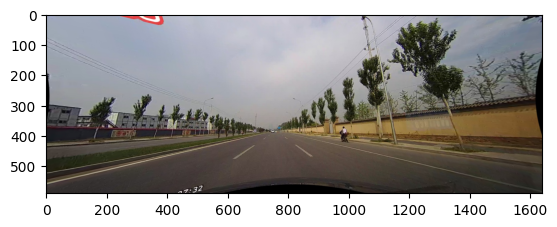

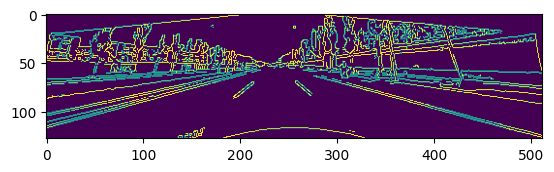

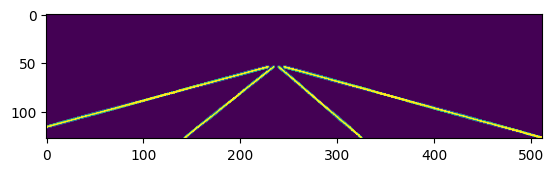

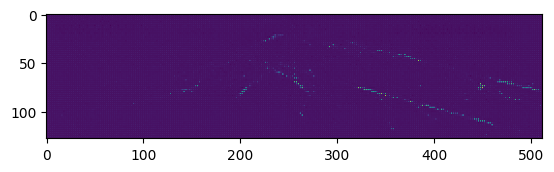

In [30]:
i =2
matplotlib.pyplot.imshow(xImage[i])
matplotlib.pyplot.show()
matplotlib.pyplot.imshow(xImgTrain[i])
matplotlib.pyplot.show()
matplotlib.pyplot.imshow(yImgTrain[i])
matplotlib.pyplot.show()
matplotlib.pyplot.imshow(result[i])
matplotlib.pyplot.show()


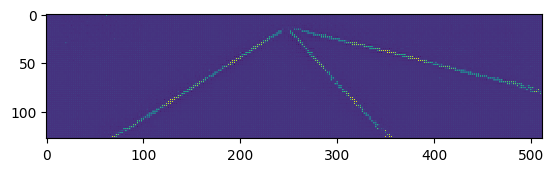

In [18]:
# result = numpy.squeeze(result, axis=3)
# # print(numpy.squeeze(result, axis=3).shape)
# result[0]
matplotlib.pyplot.imshow(result[0])
matplotlib.pyplot.show()


In [19]:
# for i in range(0, len(result)):
#     result[i] = [sublist[0] if isinstance(sublist, list) and len(sublist) == 1 and isinstance(sublist[0], list) else sublist for sublist in result[i]]

In [20]:
print(len(result))

4


In [21]:
result = numpy.array(result).reshape( -1, height, width, 1)
result.shape

(4, 128, 512, 1)

In [22]:
d = tensorflow.keras.models.load_model('discriminator_04-23_12-59_1.0.h5')
d.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 128, 512, 1  0           []                               
                                )]                                                                
                                                                                                  
 input_2 (InputLayer)           [(None, 128, 512, 1  0           []                               
                                )]                                                                
                                                                                                  
 concatenate (Concatenate)      (None, 128, 512, 2)  0           ['input_1[0][0]',                
                                                                  'input_2[0][0]']            

In [23]:
print(numpy.array(xImgTrain[0].reshape(-1, height, width)).shape)
print(numpy.array(result[0].reshape(-1, height, width)).shape)
print(numpy.array(yImgTrain[0].reshape(-1, height, width)).shape)

x = d.predict([numpy.array(xImgTrain), numpy.array(result)])
print(x)
t = d.predict([numpy.array(xImgTrain), numpy.array(yImgTrain)])
print(t)

(1, 128, 512)
(1, 128, 512)
(1, 128, 512)
1/1 [==============================] - 0s 366ms/step
[[0.000000e+00]
 [0.000000e+00]
 [0.000000e+00]
 [1.495485e-30]]
1/1 [==============================] - 0s 18ms/step
[[0.0000000e+00]
 [2.6764575e-36]
 [2.9680852e-38]
 [0.0000000e+00]]


In [24]:
def acc(d, n = 0.5):
    t = 0
    f = 0
    for i in d:
        if (i > n):
            t += 1
        else:
            f += 1
    return t / (t + f)

print(acc(x))

0.0


In [25]:
import pandas as pd

# Tên các trường bạn muốn có trong DataFrame
columns = ["his_train_loss", "his_train_acc", "his_val_loss", "his_val_acc", "his_test_acc"]

# Tạo DataFrame rỗng với các cột được chỉ định
df = pd.DataFrame(columns=columns)

# In ra DataFrame để kiểm tra
df

,his_train_loss,his_train_acc,his_val_loss,his_val_acc,his_test_acc


In [26]:
import datetime
time = datetime.datetime.now().strftime("%d-%m_%H-%M")
print(time)

25-04_22-27
